## **Import necessary libraries**

In [80]:
# Import necessary libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# **Scraper Function**
##### This function scrapes car data from the Cars24 website for Mahindra cars in Mumbai location.


In [81]:
def scraper():
    # URL for Mahindra cars in Mumbai location
    url = "https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amahindra&sort=bestmatch&serveWarrantyCount=true&listingSource=TabFilter&storeCityId=2378"

    # Send HTTP request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the content of the request with BeautifulSoup
        soup = BeautifulSoup(response.content, "html.parser")

        # Extract car details
        cars_data = soup.find_all("h3", {"class": "_11dVb"})
        cars = [i.text.split(' ', 1)[1] for i in cars_data]
        years = [i.text.split(' ', 1)[0] for i in cars_data]

        # Extract additional details
        data2 = soup.find_all("ul", {"class": "_3J2G-"})
        dist = [i.find_all('li')[0].text for i in data2]
        fuel = [i.find_all('li')[2].text for i in data2]
        trans = [i.find_all('li')[4].text for i in data2]

        # Extract prices
        prices = [i.text for i in soup.find_all('strong', {"class": "_3RL-I"})]

        # Create a dictionary to store the data
        data_dict = {
            'Car Model': cars,
            'Total Kilometers Driven': dist,
            'Year of Manufacture': years,
            'Fuel Type': fuel,
            'Transmission Type': trans,
            'Price': prices
        }

        return data_dict
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        return None


# **Save to CSV Function**
##### This function saves the scraped data to a CSV file.

In [82]:
def save_to_csv(data_dict, filename):
    # Open a CSV file to write the data
    with open(filename, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(data_dict.keys())
        writer.writerows(zip(*data_dict.values()))
    print(f"Data saved to {filename}")

# **Load and Clean CSV Function**
##### This function loads the data from the CSV file and cleans it.

In [83]:
"""def load_and_clean_csv(filename):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(filename)

    # Drop duplicate rows and rows with missing values
    cleaned_df = df.drop_duplicates().dropna()

    # Convert columns to appropriate data types
    cleaned_df['Total Kilometers Driven'] = cleaned_df['Total Kilometers Driven'].str.replace(' km', '').str.replace(',', '').astype(float)
    cleaned_df['Year of Manufacture'] = cleaned_df['Year of Manufacture'].astype(int)

    # Clean and convert Price column
    cleaned_df['Price'] = cleaned_df['Price'].str.replace('₹', '').str.replace(',', '')
    cleaned_df['Price'] = cleaned_df['Price'].apply(lambda x: float(x.replace(' Lakh', '').replace('Cr', '')) * 100000 if 'Lakh' in x else float(x.replace('Cr', '')) * 10000000)

    # Drop rows with any NaN values that might have occurred during cleaning
    cleaned_df = cleaned_df.dropna()

    return cleaned_df"""


def load_and_clean_csv(filename):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(filename)

    # Drop duplicate rows and rows with missing values
    cleaned_df = df.drop_duplicates().dropna()

    # Clean and convert 'Total Kilometers Driven' column
    cleaned_df['Total Kilometers Driven'] = cleaned_df['Total Kilometers Driven'].str.replace(' km', '').str.replace(',', '').str.strip().astype(float)

    # Clean and convert 'Year of Manufacture' column
    cleaned_df['Year of Manufacture'] = cleaned_df['Year of Manufacture'].astype(int)

    # Clean and convert 'Price' column
    cleaned_df['Price'] = cleaned_df['Price'].str.replace('₹', '').str.replace(' Lakh', 'e5').str.replace('Cr', 'e7').str.strip().astype(float).astype(int)

    # Ensure all other columns are appropriately cleaned and converted

    return cleaned_df

# **Data Analysis Function**
##### This function performs comprehensive data analysis on the cleaned data.

In [84]:
# Data Analysis Function
def data_analysis(df):

    # Inferences from Data Analysis
    print("\nInferences from the Data Analysis:\n")

    # Display basic statistics
    print("Basic Statistics:")
    print(df.describe(), "\n\n\n")

    print("Distribution of Car Prices:")
    print("    The histogram of car prices reveals the spread of prices for Mahindra cars.")
    print("    The majority of the cars fall within a specific price range.\n")

    # Plot distribution of car prices
    plt.figure(figsize=(10, 6))
    plt.hist(df['Price'], bins=20, edgecolor='k')
    plt.title('Distribution of Car Prices')
    plt.xlabel('Price (in INR)')
    plt.ylabel('Frequency')
    plt.show()
    print()

    print("Distribution of Kilometers Driven:")
    print("    The histogram shows the distribution of kilometers driven by the cars.")
    print("    This helps understand the typical usage of Mahindra cars in Mumbai.\n")

    # Plot distribution of kilometers driven
    plt.figure(figsize=(10, 6))
    plt.hist(df['Total Kilometers Driven'], bins=20, edgecolor='k')
    plt.title('Distribution of Kilometers Driven')
    plt.xlabel('Kilometers Driven')
    plt.ylabel('Frequency')
    plt.show()
    print()

    print("Fuel Type Distribution:")
    print("    The count plot indicates the frequency of different fuel types (e.g., petrol, diesel) among Mahindra cars.")
    print("    This provides insights into the preferred fuel type for Mahindra cars.\n")

    # Plot distribution of fuel types
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Fuel Type', data=df, hue='Fuel Type', dodge=False, palette='Set2', legend=False)
    plt.title('Distribution of Fuel Types')
    plt.xlabel('Fuel Type')
    plt.ylabel('Frequency')
    plt.show()
    print()

    print("Transmission Type Distribution:")
    print("    The count plot shows the distribution of transmission types (e.g., manual, automatic).")
    print("    This helps identify the popularity of different transmission types.\n")

    # Plot distribution of transmission types
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Transmission Type', data=df, hue='Transmission Type', dodge=False, palette='Set3', legend=False)
    plt.title('Distribution of Transmission Types')
    plt.xlabel('Transmission Type')
    plt.ylabel('Frequency')
    plt.show()
    print()

    print("Price vs. Kilometers Driven:")
    print("    The scatter plot highlights the relationship between the price of a car and the kilometers it has driven.")
    print("    This helps in understanding how usage impacts the price.\n")

    # Scatter plot of Price vs. Kilometers Driven
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Total Kilometers Driven'], df['Price'], alpha=0.5)
    plt.title('Price vs. Kilometers Driven')
    plt.xlabel('Kilometers Driven')
    plt.ylabel('Price (in INR)')
    plt.show()
    print()

    print("Year of Manufacture Distribution:")
    print("    The count plot shows the distribution of the year of manufacture of the cars.")
    print("    This provides insights into the age of Mahindra cars available in the market.\n")

    # Plot distribution of year of manufacture
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Year of Manufacture', data=df, hue='Year of Manufacture', dodge=False, palette='viridis', legend=False)
    plt.title('Distribution of Year of Manufacture')
    plt.xlabel('Year of Manufacture')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
    print()

    print("Average Price by Fuel Type:")
    print("    The bar plot shows the average price for each fuel type.")
    print("    This helps identify any price differences based on fuel type.\n")

    # Average price by fuel type
    plt.figure(figsize=(10, 6))
    avg_price_by_fuel = df.groupby('Fuel Type')['Price'].mean().sort_values()
    avg_price_by_fuel.plot(kind='bar', color='c')
    plt.title('Average Price by Fuel Type')
    plt.xlabel('Fuel Type')
    plt.ylabel('Average Price (in INR)')
    plt.show()
    print()

    print("Average Price by Transmission Type:")
    print("    The bar plot shows the average price for each transmission type.")
    print("    This helps understand the price variation based on transmission type.\n")

    # Average price by transmission type
    plt.figure(figsize=(10, 6))
    avg_price_by_trans = df.groupby('Transmission Type')['Price'].mean().sort_values()
    avg_price_by_trans.plot(kind='bar', color='m')
    plt.title('Average Price by Transmission Type')
    plt.xlabel('Transmission Type')
    plt.ylabel('Average Price (in INR)')
    plt.show()




# **Execution of Scraper Function**
##### Scrape the data from Cars24 and save it to a CSV file if successful.


In [85]:
data = scraper()

In [86]:
# Save data to CSV if scraping was successful
if data is not None:
    save_to_csv(data, 'Mahindra_Cars_data_.csv')
else:
    print("Data scraping failed.")


Data saved to Mahindra_Cars_data_.csv


In [87]:
data

{'Car Model': ['Mahindra XUV300 W6 1.5 DIESEL',
  'Mahindra XUV300 W8 (O) 1.2 PETROL',
  'Mahindra XUV300 W6 1.2 PETROL AMT',
  'Mahindra XUV300 W8 1.5 DIESEL',
  'Mahindra XUV500 W10 AT',
  'Mahindra XUV300 W6 1.5 DIESEL AMT',
  'Mahindra XUV500 W10 AT',
  'Mahindra XUV300 W8 1.5 DIESEL',
  'Mahindra XUV300 W6 1.2 PETROL',
  'Mahindra XUV300 W8 (O) 1.2 PETROL AMT',
  'Mahindra XUV300 W8 (O) 1.2 PETROL AMT',
  'Mahindra XUV300 W6 1.2 PETROL AMT',
  'Mahindra XUV300 W6 1.5 DIESEL AMT'],
 'Total Kilometers Driven': ['16,454 km',
  '69,558 km',
  '13,010 km',
  '80,839 km',
  '57,449 km',
  '38,524 km',
  '84,784 km',
  '51,938 km',
  '39,094 km',
  '20,405 km',
  '41,278 km',
  '18,255 km',
  '11,461 km'],
 'Year of Manufacture': ['2022',
  '2019',
  '2022',
  '2019',
  '2017',
  '2021',
  '2017',
  '2019',
  '2019',
  '2022',
  '2021',
  '2021',
  '2022'],
 'Fuel Type': ['Diesel',
  'Petrol',
  'Petrol',
  'Diesel',
  'Diesel',
  'Diesel',
  'Diesel',
  'Diesel',
  'Petrol',
  'Petrol',

# **Loading and Cleaning the Data**
##### Load and clean the data from the CSV file.


In [88]:
cleaned_data = load_and_clean_csv('Mahindra_Cars_data_.csv')


In [89]:
cleaned_data.head(8)

,Car Model,Total Kilometers Driven,Year of Manufacture,Fuel Type,Transmission Type,Price
0,Mahindra XUV300 W6 1.5 DIESEL,16454.0,2022,Diesel,Manual,1045000
1,Mahindra XUV300 W8 (O) 1.2 PETROL,69558.0,2019,Petrol,Manual,771000
2,Mahindra XUV300 W6 1.2 PETROL AMT,13010.0,2022,Petrol,Automatic,962000
3,Mahindra XUV300 W8 1.5 DIESEL,80839.0,2019,Diesel,Manual,828000
4,Mahindra XUV500 W10 AT,57449.0,2017,Diesel,Automatic,1138000
5,Mahindra XUV300 W6 1.5 DIESEL AMT,38524.0,2021,Diesel,Automatic,928000
6,Mahindra XUV500 W10 AT,84784.0,2017,Diesel,Automatic,1022000
7,Mahindra XUV300 W8 1.5 DIESEL,51938.0,2019,Diesel,Manual,884000


# **Display the cleaned DataFrame and complete Data Analysis**



Cleaned DataFrame:


,Car Model,Total Kilometers Driven,Year of Manufacture,Fuel Type,Transmission Type,Price
0,Mahindra XUV300 W6 1.5 DIESEL,16454.0,2022,Diesel,Manual,1045000
1,Mahindra XUV300 W8 (O) 1.2 PETROL,69558.0,2019,Petrol,Manual,771000
2,Mahindra XUV300 W6 1.2 PETROL AMT,13010.0,2022,Petrol,Automatic,962000
3,Mahindra XUV300 W8 1.5 DIESEL,80839.0,2019,Diesel,Manual,828000
4,Mahindra XUV500 W10 AT,57449.0,2017,Diesel,Automatic,1138000
5,Mahindra XUV300 W6 1.5 DIESEL AMT,38524.0,2021,Diesel,Automatic,928000
6,Mahindra XUV500 W10 AT,84784.0,2017,Diesel,Automatic,1022000
7,Mahindra XUV300 W8 1.5 DIESEL,51938.0,2019,Diesel,Manual,884000






Inferences from the Data Analysis:

Basic Statistics:
       Total Kilometers Driven  Year of Manufacture         Price
count                13.000000            13.000000  1.300000e+01
mean              41773.000000          2020.076923  9.656154e+05
std               25677.509601             1.846688  1.297058e+05
min               11461.000000          2017.000000  7.710000e+05
25%               18255.000000          2019.000000  8.770000e+05
50%               39094.000000          2021.000000  9.620000e+05
75%               57449.000000          2022.000000  1.066000e+06
max               84784.000000          2022.000000  1.138000e+06 



Distribution of Car Prices:
    The histogram of car prices reveals the spread of prices for Mahindra cars.
    The majority of the cars fall within a specific price range.



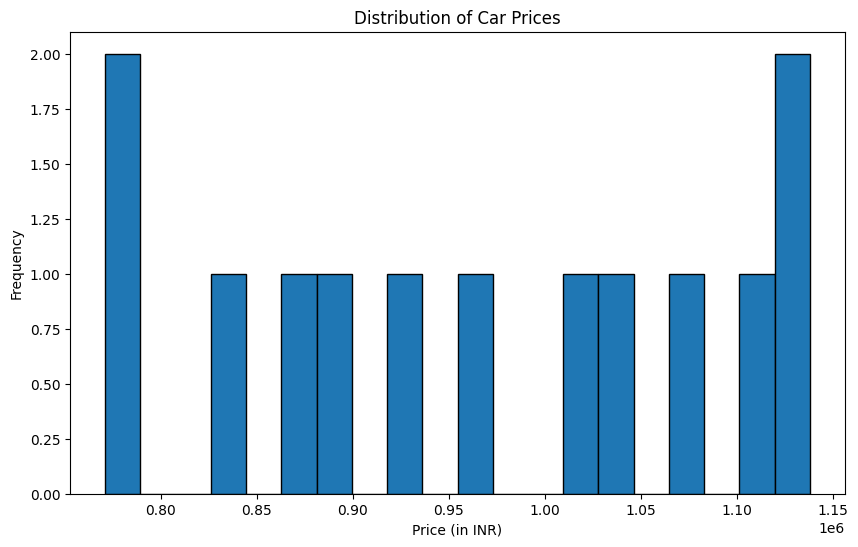


Distribution of Kilometers Driven:
    The histogram shows the distribution of kilometers driven by the cars.
    This helps understand the typical usage of Mahindra cars in Mumbai.



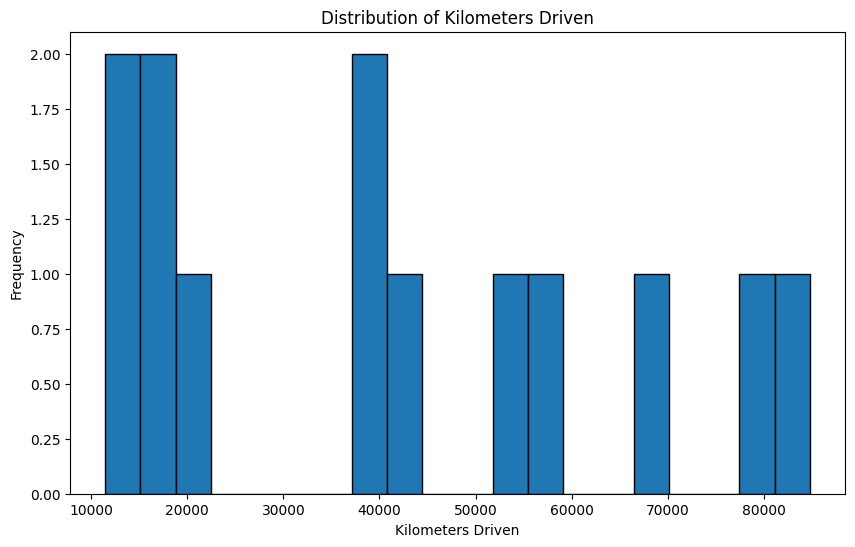


Fuel Type Distribution:
    The count plot indicates the frequency of different fuel types (e.g., petrol, diesel) among Mahindra cars.
    This provides insights into the preferred fuel type for Mahindra cars.



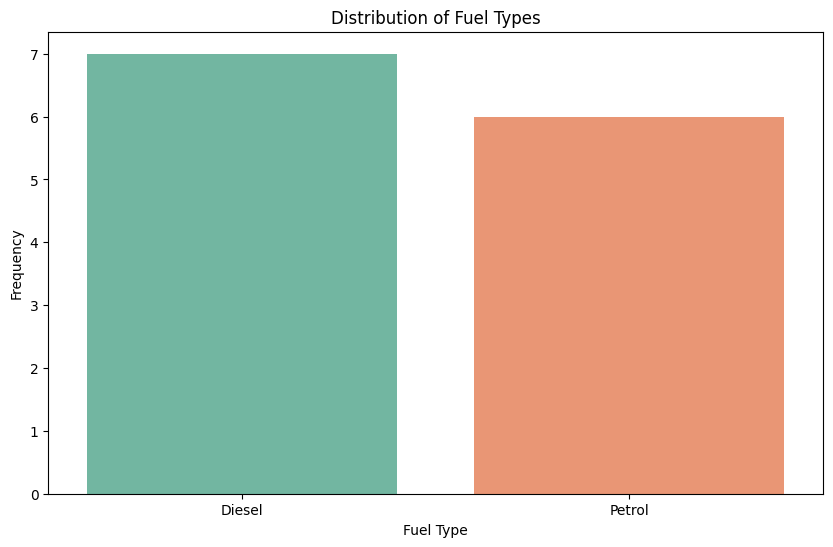


Transmission Type Distribution:
    The count plot shows the distribution of transmission types (e.g., manual, automatic).
    This helps identify the popularity of different transmission types.



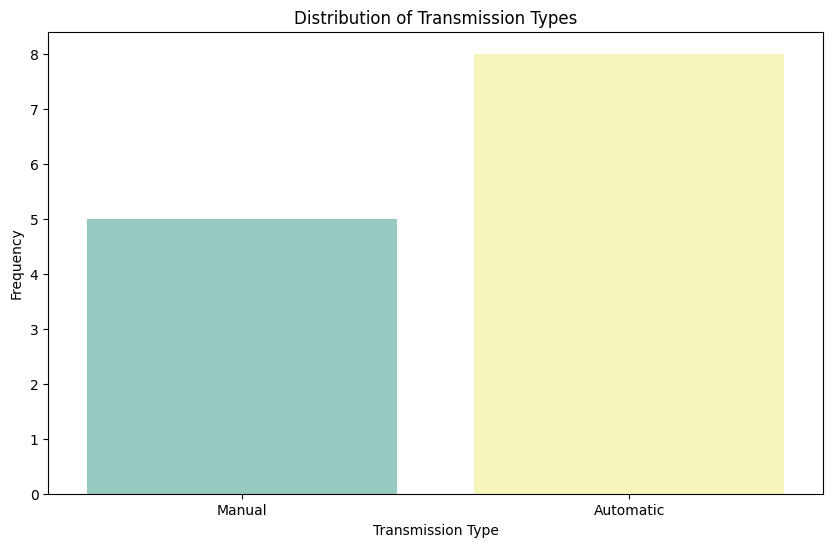


Price vs. Kilometers Driven:
    The scatter plot highlights the relationship between the price of a car and the kilometers it has driven.
    This helps in understanding how usage impacts the price.



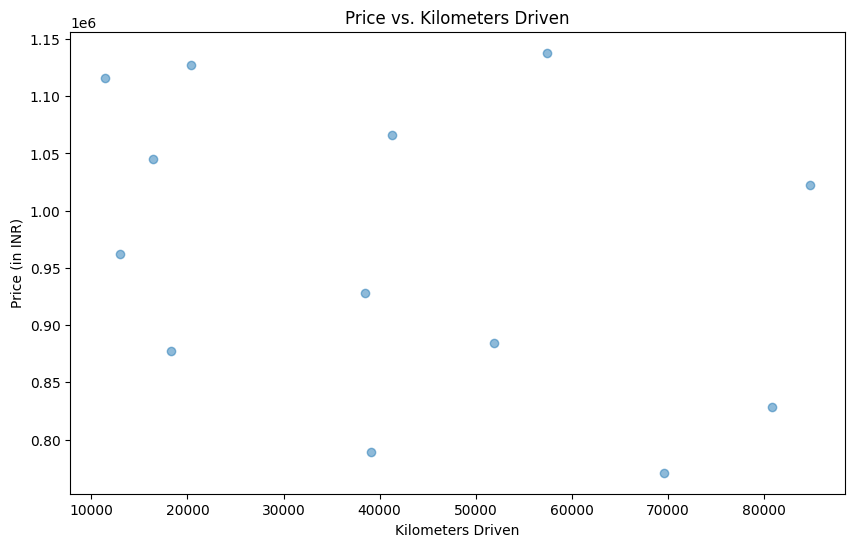


Year of Manufacture Distribution:
    The count plot shows the distribution of the year of manufacture of the cars.
    This provides insights into the age of Mahindra cars available in the market.



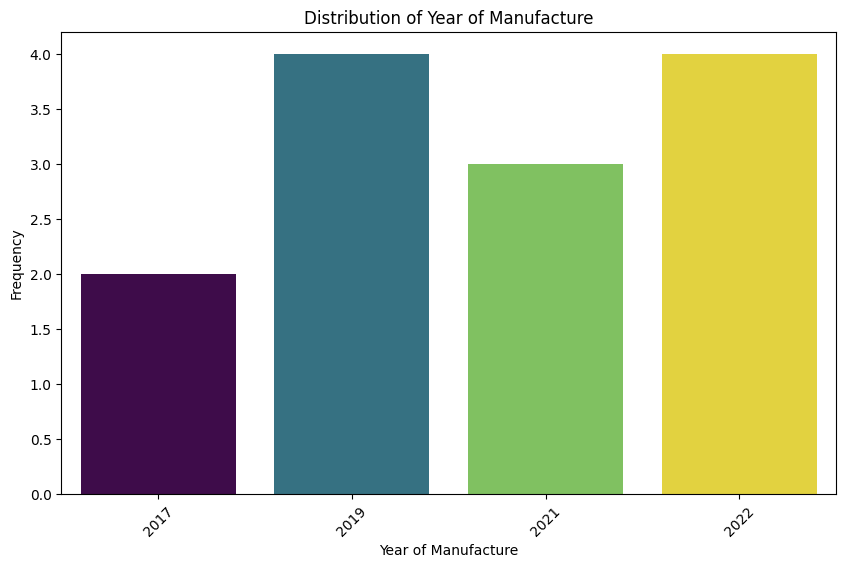


Average Price by Fuel Type:
    The bar plot shows the average price for each fuel type.
    This helps identify any price differences based on fuel type.



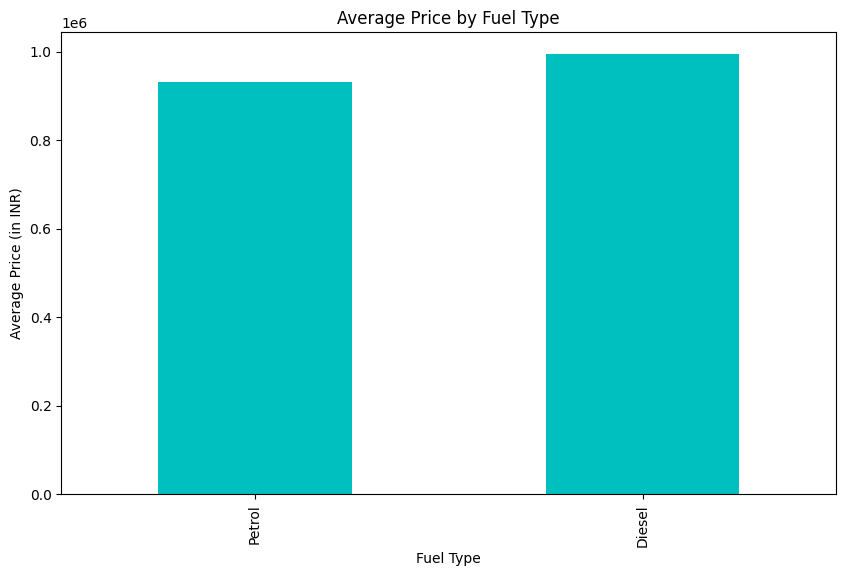


Average Price by Transmission Type:
    The bar plot shows the average price for each transmission type.
    This helps understand the price variation based on transmission type.



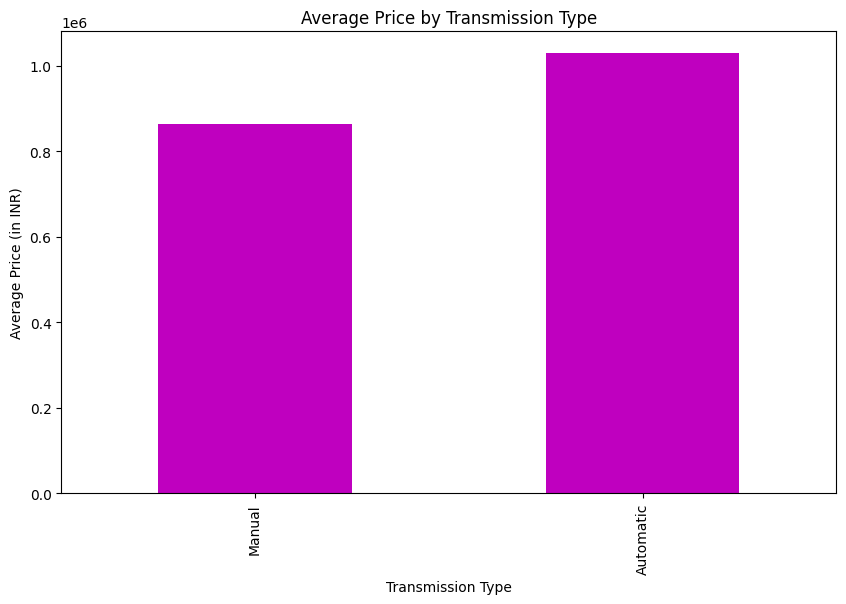

In [90]:
if cleaned_data is not None:
    print("\nCleaned DataFrame:")
    display(cleaned_data.head(8))
    print("\n\n")

    # **Comprehensive Data Analysis**
    # Perform comprehensive data analysis on the cleaned data.
    data_analysis(cleaned_data)
else:
    print("Data cleaning failed.")

#**To Find The Top 5 Cars To Buy From Based On The Data Analysis**

In [116]:
import pandas as pd

print("Debugging info:\n")

# Define a function to calculate weighted score
def calculate_score(row, weights):
    score = 0
    for attr, weight in weights.items():
        # Ensure numeric type conversion for attributes
        if isinstance(row[attr], (int, float)):
            score += row[attr] * weight
        else:
            print(f"Warning: Attribute '{attr}' is not numeric for row:\n{row}")
    return score



# Define weights for each attribute (you can adjust these based on preferences)
weights = {
    'Price': 0.4,
    'Total Kilometers Driven': 0.2,
    'Year of Manufacture': 0.2,
    'Fuel Type': 0.1,
    'Transmission Type': 0.1
}

# Normalize weights
total_weight = sum(weights.values())
weights = {k: v/total_weight for k, v in weights.items()}

# Calculate score for each row
for index, row in cleaned_data.iterrows():
    row_score = calculate_score(row, weights)
    cleaned_data.at[index, 'Score'] = row_score
    print(f"Score calculated for row {index}: {row_score}")

# Select top 5 cars based on highest score
top_cars = cleaned_data.sort_values(by='Score', ascending=False).head(5)



Debugging info:

Car Model                  Mahindra XUV300 W6 1.5 DIESEL
Total Kilometers Driven                          16454.0
Year of Manufacture                                 2022
Fuel Type                                         Diesel
Transmission Type                                 Manual
Price                                            1045000
Score                                           421695.2
Name: 0, dtype: object
Car Model                  Mahindra XUV300 W6 1.5 DIESEL
Total Kilometers Driven                          16454.0
Year of Manufacture                                 2022
Fuel Type                                         Diesel
Transmission Type                                 Manual
Price                                            1045000
Score                                           421695.2
Name: 0, dtype: object
Score calculated for row 0: 421695.2
Car Model                  Mahindra XUV300 W8 (O) 1.2 PETROL
Total Kilometers Driven                  

### Score Calculation and Weights Preference Explanation:

**Score Calculation:**
The score for each car is calculated using a weighted average approach based on key attributes. Numeric attributes like price, total kilometers driven, and year of manufacture are multiplied by their respective weights and summed to derive a final score. This score helps rank cars based on their overall desirability according to the specified criteria.

**Weights Preference:**
Weights are assigned to attributes based on their perceived importance in evaluating a car's value:
- **Price (0.4)**: Reflects affordability and budget considerations.
- **Total Kilometers Driven (0.2)**: Indicates usage and potential wear, with lower mileage typically seen as advantageous.
- **Year of Manufacture (0.2)**: Reflects the car's age, newer cars often being preferred for updated features and technology.
- **Fuel Type (0.1)** and **Transmission Type (0.1)**: Provide additional considerations such as fuel efficiency and driving experience.

Equal weighting for kilometers driven and year of manufacture (both 0.2) indicates balanced consideration between usage history and age in the evaluation process.

This weighting strategy ensures a comprehensive evaluation that balances affordability, condition, age, and specific driving preferences.


#**TOP 5 CARS TO BUY**

In [117]:
# Print top 5 cars
print("\nTop 5 Mahindra Cars to Buy Based on Weighted Attributes:\n")
print(top_cars[['Car Model', 'Year of Manufacture', 'Fuel Type', 'Transmission Type', 'Total Kilometers Driven', 'Price', 'Score']])
print("\nThese cars are recommended based on their weighted attributes.")


Top 5 Mahindra Cars to Buy Based on Weighted Attributes:

                                Car Model  Year of Manufacture Fuel Type  \
4                  Mahindra XUV500 W10 AT                 2017    Diesel   
9   Mahindra XUV300 W8 (O) 1.2 PETROL AMT                 2022    Petrol   
12      Mahindra XUV300 W6 1.5 DIESEL AMT                 2022    Diesel   
10  Mahindra XUV300 W8 (O) 1.2 PETROL AMT                 2021    Petrol   
6                  Mahindra XUV500 W10 AT                 2017    Diesel   

   Transmission Type  Total Kilometers Driven    Price     Score  
4          Automatic                  57449.0  1138000  467093.2  
9          Automatic                  20405.0  1127000  455285.4  
12         Automatic                  11461.0  1116000  449096.6  
10         Automatic                  41278.0  1066000  435059.8  
6          Automatic                  84784.0  1022000  426160.2  

These cars are recommended based on their weighted attributes.
